# 1. Definição do Problema

## Identificação de Alunos em Risco de Abandono

A identificação de alunos em risco de abandono escolar ou de baixo desempenho acadêmico é uma área crítica onde a ciência de dados pode fazer uma grande diferença. 
Esse tipo de análise pode ajudar educadores e administradores a tomar medidas proativas para apoiar esses alunos.

Utilizaremos dados acadêmicos como: notas e frequência para tentar prever alunos com potênciais riscos de abandono, dessa forma, dando a possibilidade das escolas, professores, diretores, etc a desenvolver medidas para reverter esse quadro de abandono a tempo.


## Dados 

O dados utilizados nessa análise são da Secretária de Educação do Ceará que inclui dados de várias escolas estaduais. Nenhum dados será disponibilizado, todo dados só será usado para geração de análises e apresentação da solução proposta. Todo dados utilizado neste trabalho é de propriedade da SEDUC e não poderar ser compartilhado.

Os dados utilizados são todos reais e foram obtidos com o consentimento da SEDUC através de consultas ao banco de produção.

Descrição dos dados

### Fontes de Dados:

* Abandonos
* Dados Acadêmicos: Notas, frequência.
* Dados Demográficos: Idade, gênero, localização.

# 2. Coleta e Pré-processamento de Dados

## Instalação das dependências

In [1]:
%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scikit-learn
%pip install pyarrow
%pip install fastparquet


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip
Note

## Carregamento dos dados

In [20]:
import pandas as pd
import numpy as np

# dados já tratados previamente para conseguir processar com a memória disponível
df = pd.read_parquet('datasets/dados-com-features.parquet')
print(df.columns)
pd.set_option('display.max_columns', None)

# preenche nr_faltasjan_pt até nr_faltasdez_pt com 0
meses = ['jan', 'fev', 'mar', 'abr', 'mai', 'jun', 'jul', 'ago', 'set', 'out', 'nov', 'dez']

# preenchendo colunas de faltas com 0 pois quando n tem falta a informação n é registrada
for i in range(0, 12):
    df['nr_faltas' + meses[i] + '_pt'] = df['nr_faltas' + meses[i] + '_pt'].fillna(0)
    df['nr_faltas' + meses[i] + '_mat'] = df['nr_faltas' + meses[i] + '_mat'].fillna(0)

df.head()


Index(['ci_aluno', 'fl_sexo', 'aluno_municipio_id', 'aluno_estado',
       'aluno_municipio_latitude', 'aluno_municipio_longitude', 'ci_turma',
       'cd_etapa', 'cd_turno', 'ci_unidade_trabalho',
       'unidade_trabalho_latitude', 'unidade_trabalho_longitude', 'abandonou',
       'nr_cargahoraria_mat', 'nr_cargahoraria_pt', 'nr_faltasabr_mat',
       'nr_faltasabr_pt', 'nr_faltasago_mat', 'nr_faltasago_pt',
       'nr_faltasdez_mat', 'nr_faltasdez_pt', 'nr_faltasfev_mat',
       'nr_faltasfev_pt', 'nr_faltasjan_mat', 'nr_faltasjan_pt',
       'nr_faltasjul_mat', 'nr_faltasjul_pt', 'nr_faltasjun_mat',
       'nr_faltasjun_pt', 'nr_faltasmai_mat', 'nr_faltasmai_pt',
       'nr_faltasmar_mat', 'nr_faltasmar_pt', 'nr_faltasnov_mat',
       'nr_faltasnov_pt', 'nr_faltasout_mat', 'nr_faltasout_pt',
       'nr_faltasset_mat', 'nr_faltasset_pt', 'nr_mediaanual_mat',
       'nr_mediaanual_pt', 'nr_mediafinal_mat', 'nr_mediafinal_pt',
       'nr_nota_1_mat', 'nr_nota_1_pt', 'nr_nota_2_mat', '

,ci_aluno,fl_sexo,aluno_municipio_id,aluno_estado,aluno_municipio_latitude,aluno_municipio_longitude,ci_turma,cd_etapa,cd_turno,ci_unidade_trabalho,unidade_trabalho_latitude,unidade_trabalho_longitude,abandonou,nr_cargahoraria_mat,nr_cargahoraria_pt,nr_faltasabr_mat,nr_faltasabr_pt,nr_faltasago_mat,nr_faltasago_pt,nr_faltasdez_mat,nr_faltasdez_pt,nr_faltasfev_mat,nr_faltasfev_pt,nr_faltasjan_mat,nr_faltasjan_pt,nr_faltasjul_mat,nr_faltasjul_pt,nr_faltasjun_mat,nr_faltasjun_pt,nr_faltasmai_mat,nr_faltasmai_pt,nr_faltasmar_mat,nr_faltasmar_pt,nr_faltasnov_mat,nr_faltasnov_pt,nr_faltasout_mat,nr_faltasout_pt,nr_faltasset_mat,nr_faltasset_pt,nr_mediaanual_mat,nr_mediaanual_pt,nr_mediafinal_mat,nr_mediafinal_pt,nr_nota_1_mat,nr_nota_1_pt,nr_nota_2_mat,nr_nota_2_pt,nr_nota_3_mat,nr_nota_3_pt,nr_nota_4_mat,nr_nota_4_pt,nr_nota_5_mat,nr_nota_5_pt,nr_anoletivo
0,1,F,1422.0,CE,-3.498221,-39.582102,773692,125,4,3146,-3.531454,-39.711247,False,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5,8.666667,8.5,8.666667,8.500,8.000000,8.0,8.000000,9.000,9.000,8.500,8.666667,NaN,NaN,2021
1,2,F,1422.0,CE,-3.498221,-39.582102,773694,126,1,3146,-3.531454,-39.711247,False,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,7.500000,8.0,7.500000,8.250,7.250000,8.0,7.875000,7.500,7.750,7.500,7.000000,NaN,NaN,2021
2,27,F,1125.0,CE,-2.904865,-40.120302,751724,163,1,131,-2.899620,-40.223960,False,5.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,8.5,9.000000,8.5,9.000000,8.225,8.833333,9.0,8.500000,8.925,9.500,8.375,9.333333,NaN,NaN,2021
3,58,M,1526.0,CE,-5.113505,-38.372942,760313,125,5,6768,NaN,NaN,False,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,6.333333,6.0,6.333333,6.000,6.000000,6.5,6.666667,6.000,6.000,6.000,6.000000,NaN,NaN,2021
4,98,F,1126.0,CE,-6.103561,-39.462628,804514,126,1,9147,NaN,NaN,False,4.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,7.000000,7.0,7.000000,6.500,6.875000,6.5,7.125000,7.000,6.625,7.500,7.625000,NaN,NaN,2021


In [21]:
# exibir quantidade de valores null por coluna
df.isnull().sum()


ci_aluno                            0
fl_sexo                             0
aluno_municipio_id              10329
aluno_estado                    10329
aluno_municipio_latitude        15359
aluno_municipio_longitude       15359
ci_turma                            0
cd_etapa                            0
cd_turno                            0
ci_unidade_trabalho                 0
unidade_trabalho_latitude     2817397
unidade_trabalho_longitude    2817397
abandonou                           0
nr_cargahoraria_mat            117784
nr_cargahoraria_pt              27665
nr_faltasabr_mat                    0
nr_faltasabr_pt                     0
nr_faltasago_mat                    0
nr_faltasago_pt                     0
nr_faltasdez_mat                    0
nr_faltasdez_pt                     0
nr_faltasfev_mat                    0
nr_faltasfev_pt                     0
nr_faltasjan_mat                    0
nr_faltasjan_pt                     0
nr_faltasjul_mat                    0
nr_faltasjul

In [22]:
df[df['ci_aluno'] == 1]

,ci_aluno,fl_sexo,aluno_municipio_id,aluno_estado,aluno_municipio_latitude,aluno_municipio_longitude,ci_turma,cd_etapa,cd_turno,ci_unidade_trabalho,unidade_trabalho_latitude,unidade_trabalho_longitude,abandonou,nr_cargahoraria_mat,nr_cargahoraria_pt,nr_faltasabr_mat,nr_faltasabr_pt,nr_faltasago_mat,nr_faltasago_pt,nr_faltasdez_mat,nr_faltasdez_pt,nr_faltasfev_mat,nr_faltasfev_pt,nr_faltasjan_mat,nr_faltasjan_pt,nr_faltasjul_mat,nr_faltasjul_pt,nr_faltasjun_mat,nr_faltasjun_pt,nr_faltasmai_mat,nr_faltasmai_pt,nr_faltasmar_mat,nr_faltasmar_pt,nr_faltasnov_mat,nr_faltasnov_pt,nr_faltasout_mat,nr_faltasout_pt,nr_faltasset_mat,nr_faltasset_pt,nr_mediaanual_mat,nr_mediaanual_pt,nr_mediafinal_mat,nr_mediafinal_pt,nr_nota_1_mat,nr_nota_1_pt,nr_nota_2_mat,nr_nota_2_pt,nr_nota_3_mat,nr_nota_3_pt,nr_nota_4_mat,nr_nota_4_pt,nr_nota_5_mat,nr_nota_5_pt,nr_anoletivo
0,1,F,1422.0,CE,-3.498221,-39.582102,773692,125,4,3146,-3.531454,-39.711247,False,4.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.5,8.666667,8.5,8.666667,8.50,8.00,8.00,8.000,9.0,9.000,8.50,8.666667,NaN,NaN,2021
1115991,1,F,1422.0,CE,-3.498221,-39.582102,846804,126,1,3146,-3.531454,-39.711247,False,4.0,9.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,4.0,2.0,0.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,8.000000,8.0,8.000000,7.50,7.25,7.25,7.875,9.0,8.000,8.25,7.500000,NaN,NaN,2022
2259901,1,F,1422.0,CE,-3.498221,-39.582102,911952,127,1,3146,-3.531454,-39.711247,False,4.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,4.0,2.0,6.0,2.0,0.0,0.0,0.0,0.0,0.0,8.5,8.000000,8.5,8.000000,8.75,7.25,8.50,7.625,8.0,7.875,8.50,8.750000,NaN,NaN,2023
3380070,1,F,1422.0,CE,-3.498221,-39.582102,985102,128,10,3146,-3.531454,-39.711247,False,6.0,12.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,9.00,8.25,9.25,8.125,9.0,8.375,NaN,NaN,NaN,NaN,2024


## Distribuição do dado

In [26]:
# exiba como está a distribuição do dataset de abandonos
df['abandonou'].value_counts()

abandonou
False    4439519
True       25459
Name: count, dtype: int64

In [27]:
df['fl_sexo'].value_counts()

fl_sexo
M    2260441
F    2204537
Name: count, dtype: int64

In [28]:
# 1: 'Tarde',
# 2: 'Noite',
# 3: 'Flexível',
# 4: 'Manhã',
# 5: 'Integral (45h)',
# 6: 'NUNCA ESTUDOU',
# 7: 'Intermediário',
# 8: 'Integral (35h M/T)',
# 9: 'Integral (35h T/N)',
# 10: 'Integral (40h)'

df['cd_turno'].value_counts()

cd_turno
4     1567404
1     1517333
5      880545
2      359719
10      78388
8       48542
9        7593
7        3702
3        1752
Name: count, dtype: int64

In [ ]:
df['aluno_estado'].value_counts()

aluno_estado
CE    4449619
RN       2619
PE       1588
PI        427
PB        155
SE         68
TO         38
SP         34
MG         23
BA         20
AM         17
PA          8
AP          7
SC          7
DF          6
RJ          6
GO          2
RS          2
AL          2
MA          1
Name: count, dtype: int64

## Pré-processamento

### Converte estado para valor numerico

In [31]:
# converte a coluna aluno_estado para numérico dando um numero para cada estado

df['aluno_estado'] = df['aluno_estado'].map({
    'AC': 1,
    'AL': 2,
    'AM': 3,
    'AP': 4,
    'BA': 5,
    'CE': 6,
    'DF': 7,
    'ES': 8,
    'GO': 9,
    'MA': 10,
    'MG': 11,
    'MS': 12,
    'MT': 13,
    'PA': 14,
    'PB': 15,
    'PE': 16,
    'PI': 17,
    'PR': 18,
    'RJ': 19,
    'RN': 20,
    'RO': 21,
    'RR': 22,
    'RS': 23,
    'SC': 24,
    'SE': 25,
    'SP': 26,
    'TO': 27
})

### Converte fl_sexo para valor numerico

In [36]:
# converte fl_sexo para valor numerico
#  1: 'M'
#  2: 'F',
df['fl_sexo'] = df['fl_sexo'].map({
    'M': 1,
    'F': 2
})

### Separa as colunas para o treinamento

## 2. Análise Exploratória de Dados (EDA)
* Visualização de Dados: Utilizar gráficos para identificar padrões e outliers.
* Estatísticas Descritivas: Média, mediana, desvio padrão das variáveis importantes.
* Correlação: Análise de correlação para entender as relações entre diferentes variáveis.

In [37]:
# exiba a quantidade de valores faltantes no dataset
print('Abandonos\n########')
print('Total', df.size)

print('\nValores faltantes')
print(df.isnull().sum())


Abandonos
########
Total 241108812

Valores faltantes
ci_aluno                            0
fl_sexo                             0
aluno_municipio_id              10329
aluno_estado                    10329
aluno_municipio_latitude        15359
aluno_municipio_longitude       15359
ci_turma                            0
cd_etapa                            0
cd_turno                            0
ci_unidade_trabalho                 0
unidade_trabalho_latitude     2817397
unidade_trabalho_longitude    2817397
abandonou                           0
nr_cargahoraria_mat            117784
nr_cargahoraria_pt              27665
nr_faltasabr_mat                    0
nr_faltasabr_pt                     0
nr_faltasago_mat                    0
nr_faltasago_pt                     0
nr_faltasdez_mat                    0
nr_faltasdez_pt                     0
nr_faltasfev_mat                    0
nr_faltasfev_pt                     0
nr_faltasjan_mat                    0
nr_faltasjan_pt                   

### Matriz Correlação

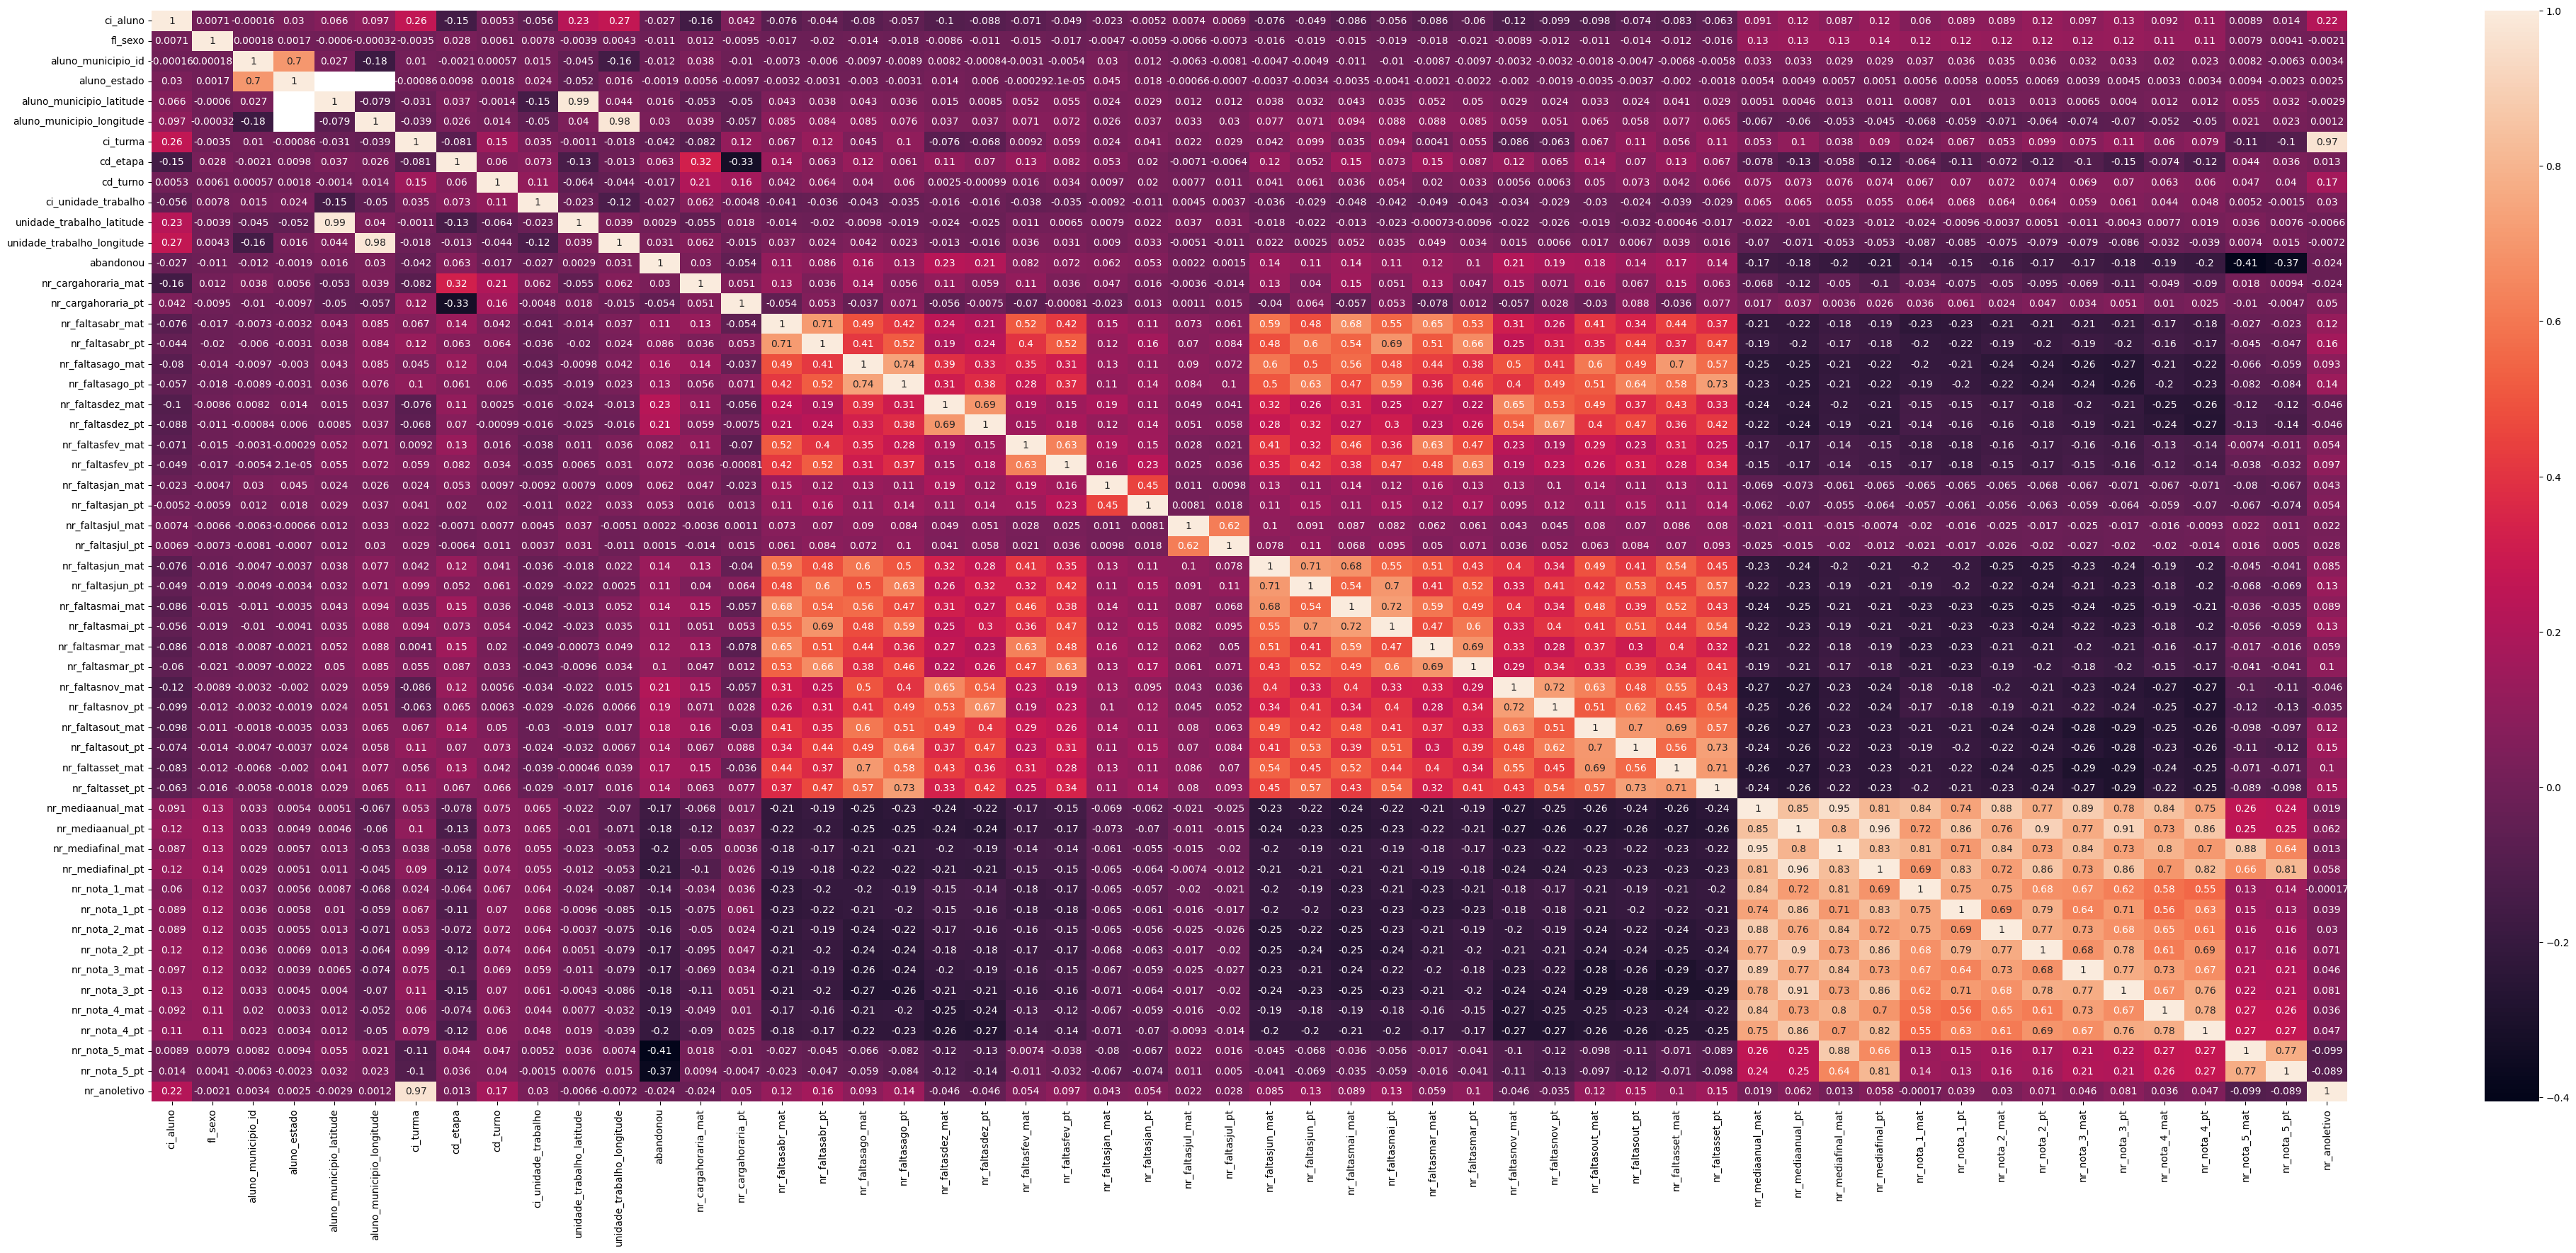

In [40]:
#  matriz de correlação sem a coluna situacao
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(50, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Agrupamento das faltas do mês por período pois elas tem um coorrelação alta para reduzir a dimensionalidade

In [ ]:
columns_faltas  = [col for col in df.columns if 'nr_faltas' in col]
columns_faltas

df['faltas_periodo_1_pt'] = df[['nr_faltasjan_pt', 'nr_faltasfev_pt', 'nr_faltasmar_pt']].sum(axis=1)
df['faltas_periodo_2_pt'] = df[['nr_faltasabr_pt', 'nr_faltasmai_pt', 'nr_faltasjun_pt']].sum(axis=1)
df['faltas_periodo_3_pt'] = df[['nr_faltasjul_pt', 'nr_faltasago_pt', 'nr_faltasset_pt']].sum(axis=1)
df['faltas_periodo_4_pt'] = df[['nr_faltasout_pt', 'nr_faltasnov_pt', 'nr_faltasdez_pt']].sum(axis=1)

df['faltas_periodo_1_mat'] = df[['nr_faltasjan_mat', 'nr_faltasfev_mat', 'nr_faltasmar_mat']].sum(axis=1)
df['faltas_periodo_2_mat'] = df[['nr_faltasabr_mat', 'nr_faltasmai_mat', 'nr_faltasjun_mat']].sum(axis=1)
df['faltas_periodo_3_mat'] = df[['nr_faltasjul_mat', 'nr_faltasago_mat', 'nr_faltasset_mat']].sum(axis=1)
df['faltas_periodo_4_mat'] = df[['nr_faltasout_mat', 'nr_faltasnov_mat', 'nr_faltasdez_mat']].sum(axis=1)

df.drop(columns=columns_faltas, inplace=True)

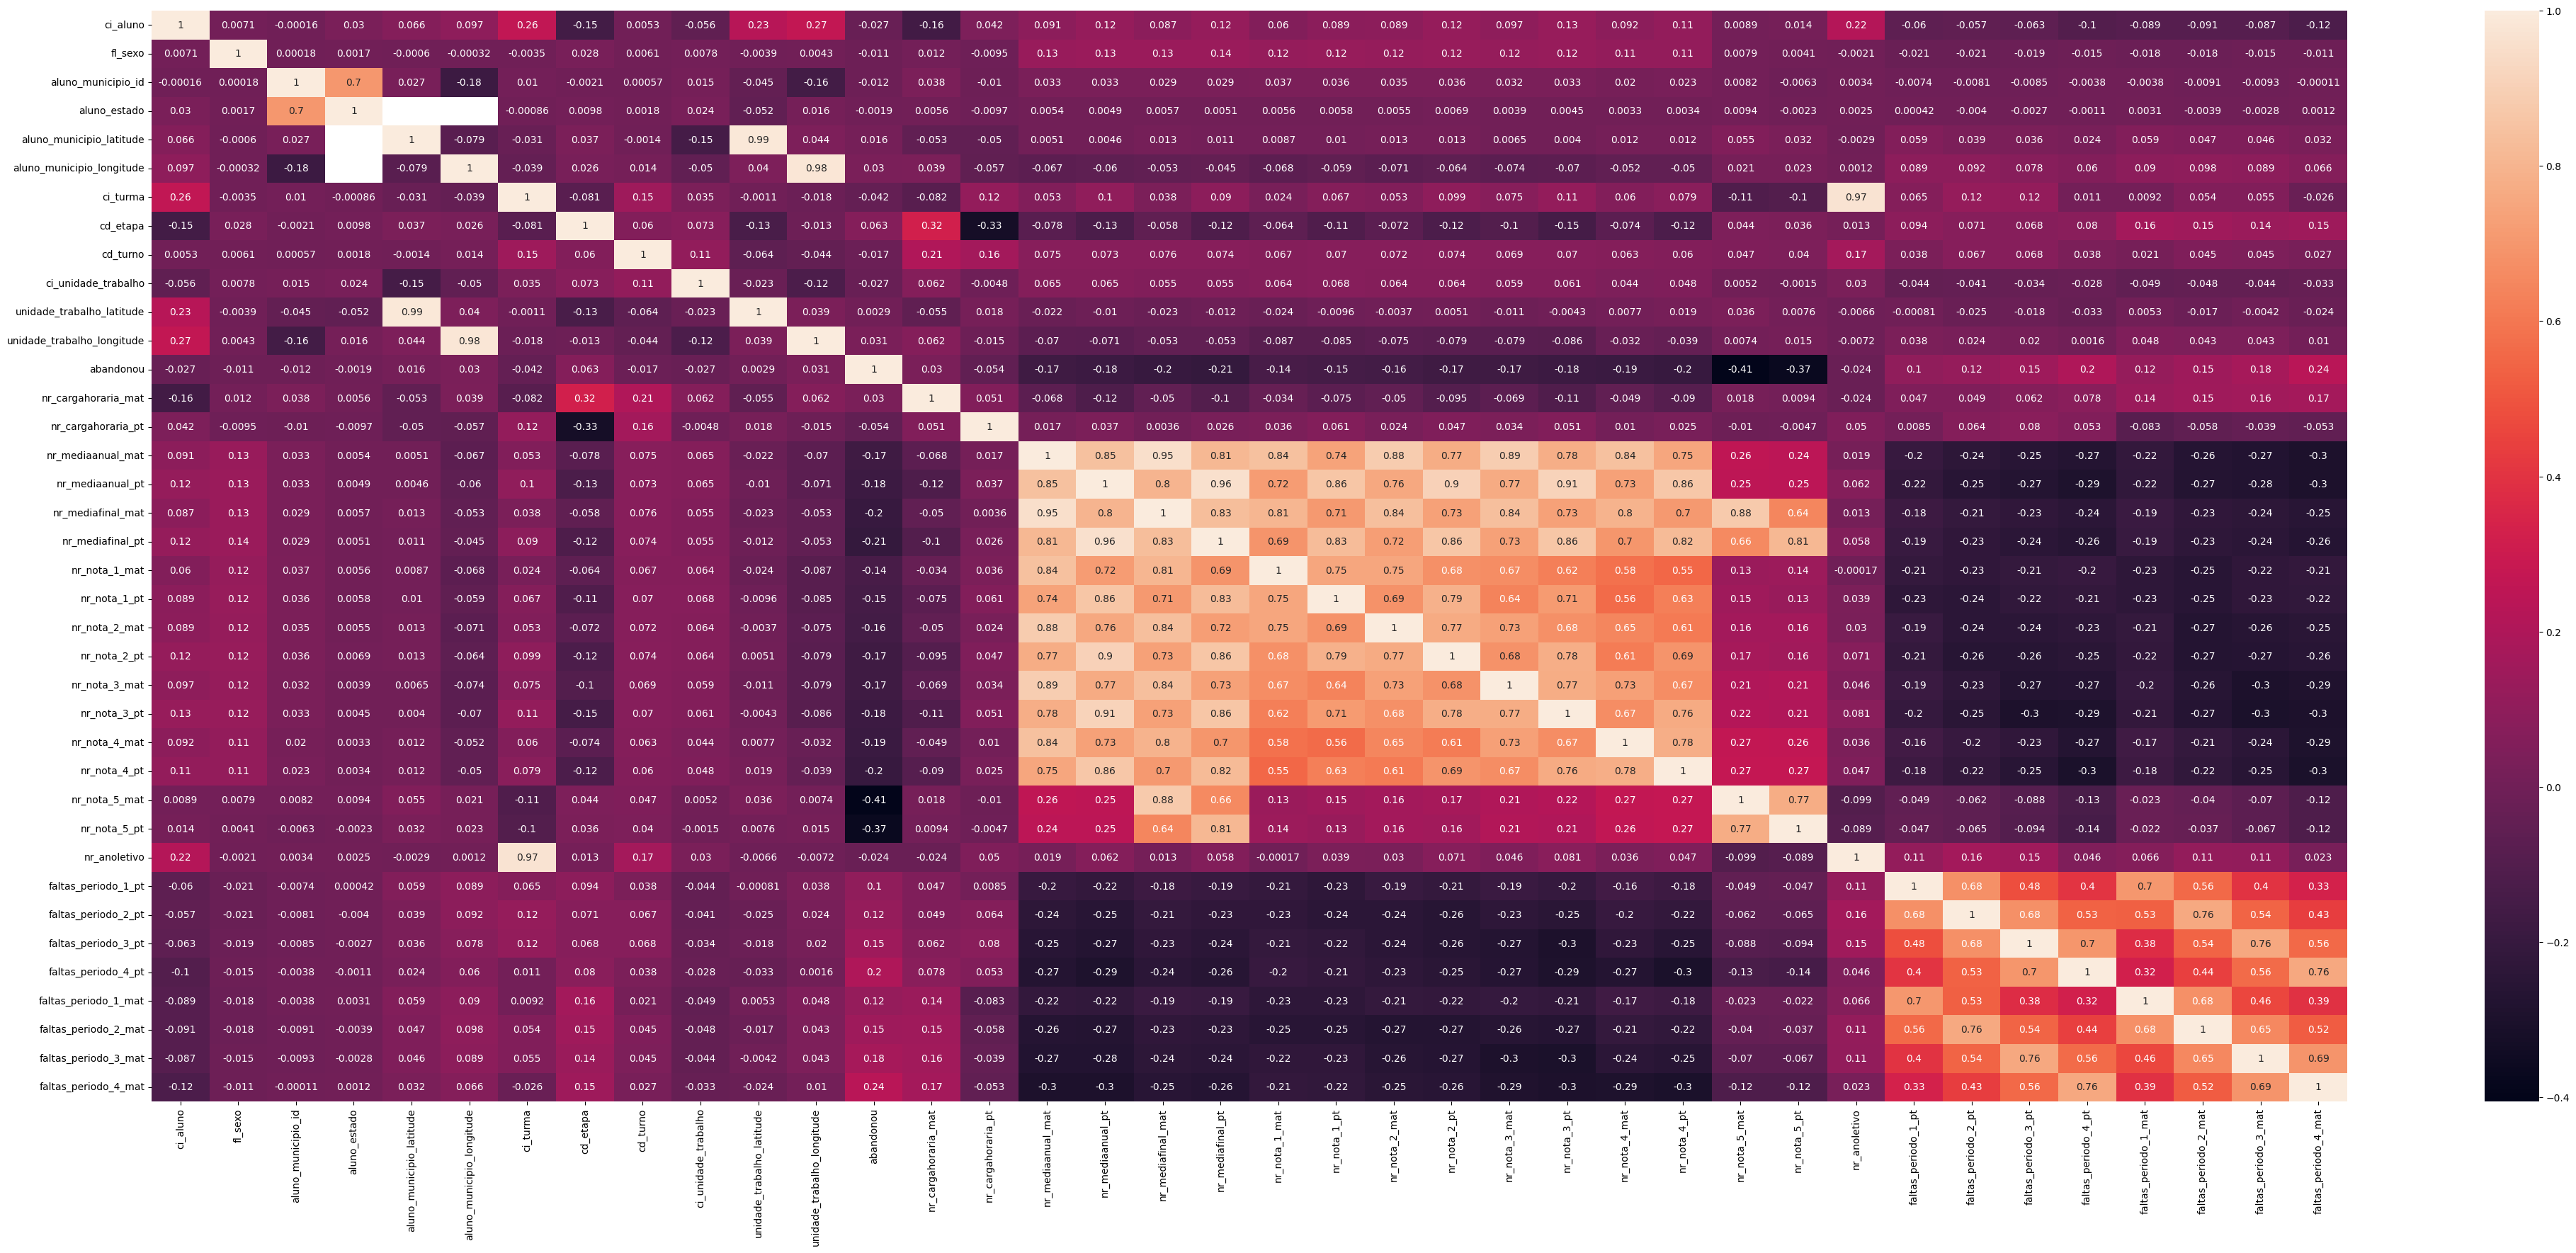

In [44]:

plt.figure(figsize=(50, 20))
sns.heatmap(df.corr(), annot=True)
plt.show()

### Situação

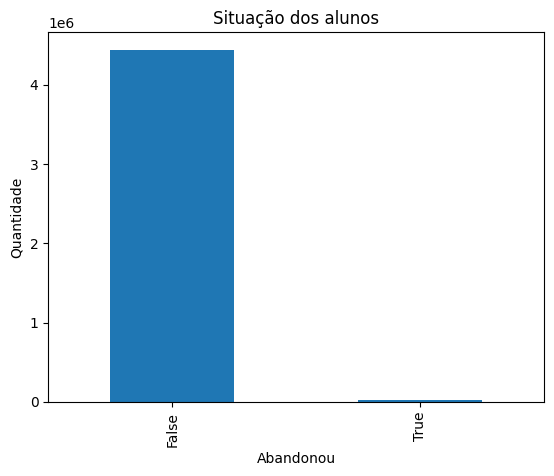

In [46]:
# gere graficos para analisar a distribuição dos dados
import matplotlib.pyplot as plt

df['abandonou'].value_counts().plot(kind='bar')
plt.title('Situação dos alunos')
plt.xlabel('Abandonou')
plt.ylabel('Quantidade')
plt.show()




### Distibruição das médias

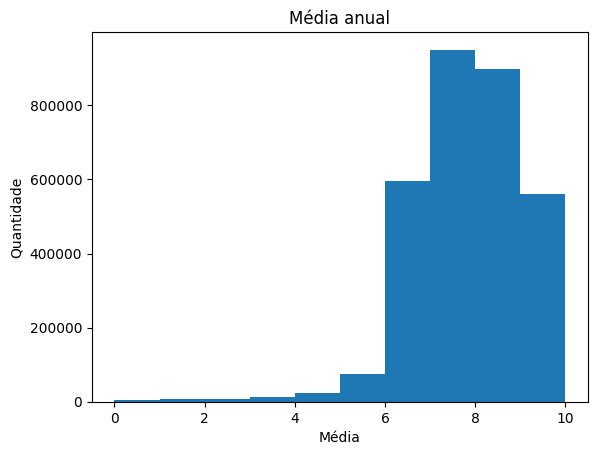

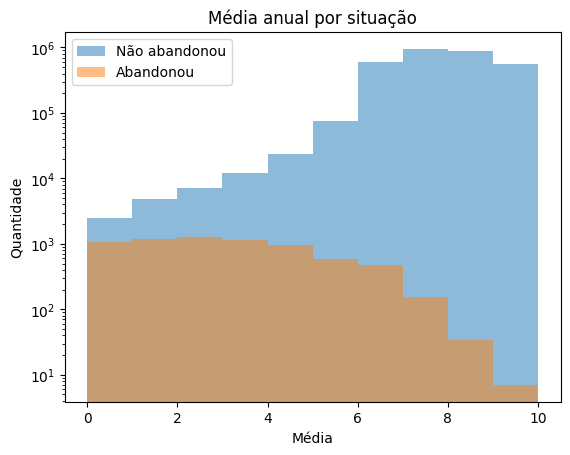

In [57]:

df['nr_mediaanual_pt'].plot(kind='hist')
plt.title('Média anual')
plt.xlabel('Média')
plt.ylabel('Quantidade')
plt.show()

situacoes = df['abandonou'].unique()
# plot o grafico de médias separado por situação no mesmo gráfico

for situacao in situacoes:
    label = 'Abandonou' if situacao == 1 else 'Não abandonou'
    df[df['abandonou'] == situacao]['nr_mediaanual_pt'].plot(kind='hist', alpha=0.5, label=label)
    
plt.title('Média anual por situação')
plt.yscale('log')
plt.xlabel('Média')
plt.ylabel('Quantidade')
plt.legend()
plt.show()


## 3. Modelagem Preditiva
### Escolha de Modelos:

* Regressão Logística: Útil para prever uma variável binária, como se um aluno está em risco ou não.
* Árvores de Decisão e Florestas Aleatórias: Modelos que podem lidar bem com dados categóricos e fornecer uma interpretação clara sobre as decisões.
* Máquinas de Vetores de Suporte (SVM): Úteis para classificações em cenários complexos.
* Redes Neurais: Podem capturar relações não lineares complexas, mas requerem mais dados e poder computacional.

### Validação do Modelo:

* Divisão do Conjunto de Dados: Separar dados em conjuntos de treino e teste (e, se possível, um conjunto de validação).
* Cross-validation: Utilizar validação cruzada para garantir que o modelo não esteja superajustado.
* Métricas de Desempenho: Acurácia, precisão, recall, F1-score, AUC-ROC.

In [58]:
# use random forest para prever a situação do aluno
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
# 'ci_aluno', 'fl_sexo', 'aluno_municipio_id', 'aluno_estado',
#        'aluno_municipio_latitude', 'aluno_municipio_longitude', 'ci_turma',
#        'cd_etapa', 'cd_turno', 'ci_unidade_trabalho',
#        'unidade_trabalho_latitude', 'unidade_trabalho_longitude', 'abandonou',
#        'nr_cargahoraria_mat', 'nr_cargahoraria_pt', 'nr_faltasabr_mat',
#        'nr_faltasabr_pt', 'nr_faltasago_mat', 'nr_faltasago_pt',
#        'nr_faltasdez_mat', 'nr_faltasdez_pt', 'nr_faltasfev_mat',
#        'nr_faltasfev_pt', 'nr_faltasjan_mat', 'nr_faltasjan_pt',
#        'nr_faltasjul_mat', 'nr_faltasjul_pt', 'nr_faltasjun_mat',
#        'nr_faltasjun_pt', 'nr_faltasmai_mat', 'nr_faltasmai_pt',
#        'nr_faltasmar_mat', 'nr_faltasmar_pt', 'nr_faltasnov_mat',
#        'nr_faltasnov_pt', 'nr_faltasout_mat', 'nr_faltasout_pt',
#        'nr_faltasset_mat', 'nr_faltasset_pt', 'nr_mediaanual_mat',
#        'nr_mediaanual_pt', 'nr_mediafinal_mat', 'nr_mediafinal_pt',
#        'nr_nota_1_mat', 'nr_nota_1_pt', 'nr_nota_2_mat', 'nr_nota_2_pt',
#        'nr_nota_3_mat', 'nr_nota_3_pt', 'nr_nota_4_mat', 'nr_nota_4_pt',
#        'nr_nota_5_mat', 'nr_nota_5_pt', 'nr_anoletivo'
X = df.drop(columns=['abandonou', 'ci_unidade_trabalho', 'ci_turma', 'ci_aluno'])
y = df['abandonou']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

clf = RandomForestClassifier()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1331868
        True       0.88      0.75      0.81      7626

    accuracy                           1.00   1339494
   macro avg       0.94      0.87      0.90   1339494
weighted avg       1.00      1.00      1.00   1339494



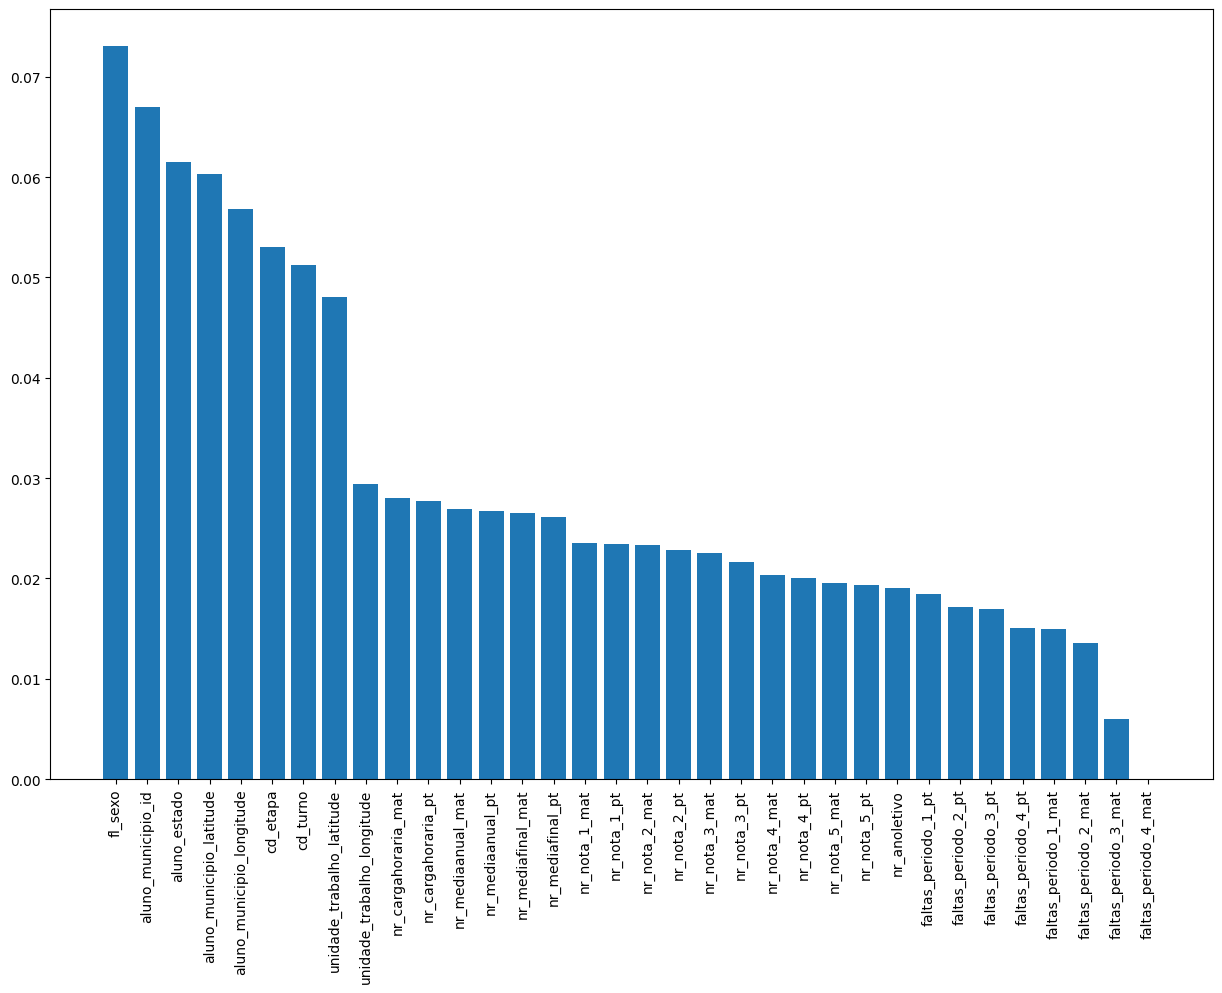

In [59]:
# plote a importancia das features
plt.figure(figsize=(15, 10))
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]
plt.bar(X.columns, importances[indices])
plt.xticks(rotation=90)
plt.show()

In [86]:
# use o modelo para prever a situação de um aluno
X_new = X.sample()
y_new = clf.predict(X_new)
print('Situação prevista', y_new)
print('Situação real', y.loc[X_new.index])

Situação prevista [False]
Situação real 82685    False
Name: abandonou, dtype: bool


In [87]:
y_pred = clf.predict(X_test)

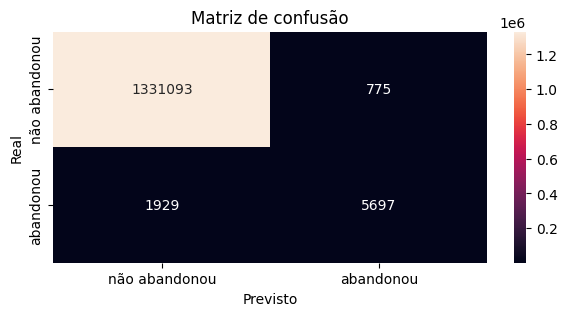

              precision    recall  f1-score   support

       False       1.00      1.00      1.00   1331868
        True       0.88      0.75      0.81      7626

    accuracy                           1.00   1339494
   macro avg       0.94      0.87      0.90   1339494
weighted avg       1.00      1.00      1.00   1339494



In [91]:
# faça uma Matriz de Confusão: Mostra as contagens de previsões corretas e incorretas para cada classe, facilitando a visualização dos erros.
# converta os valores preditos para situação
# adicione label aos eixos x e y
# n use valores cientificos
# exiba a situacao ao invés do abandonou
# true - abandonou
# false - não abandonou
from sklearn.metrics import confusion_matrix
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7, 3))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['não abandonou', 'abandonou'], yticklabels=['não abandonou', 'abandonou'])
plt.title('Matriz de confusão')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()


print(classification_report(y_test, y_pred))


## 4. Implementação e Monitoramento
### Deploy do Modelo:

* Integração: Integrar o modelo em sistemas existentes de gerenciamento escolar.
* Interface de Usuário: Criar dashboards para que educadores possam facilmente visualizar os alunos em risco.

### Monitoramento Contínuo:

* Re-treinamento: Atualizar o modelo periodicamente com novos dados para manter a precisão.
* Feedback de Usuário: Incorporar feedback de professores e administradores para refinar o modelo.

## 5. Intervenção
### Estratégias de Intervenção:

* Tutoria Personalizada: Programas de mentoria para alunos identificados como de risco.
* Recursos Adicionais: Materiais de estudo adicionais, sessões de revisão.
* Apoio Psicológico: Serviços de aconselhamento para lidar com problemas emocionais ou sociais.
* Engajamento Parental: Envolver os pais ou responsáveis no processo educativo.

### Avaliação das Intervenções:

* Medição de Impacto: Monitorar o progresso dos alunos após a intervenção.
* Ajustes nas Estratégias: Refinar as estratégias de intervenção com base nos resultados.